# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)
>
<img src="../relatorios/imagens/housesbanner.png" width=800>

- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**
    - Tem também um arquivo 'md' com as colunas traduzidas, e com um pouco mais de informação, que são resultados da análise do **ProfileReport**, chamado "01_dicionario_de_dados.md" na pasta 'referencias'.

### OBJETIVO GERAL:
Avaliar a evolução do nosso modelo de ML, realizando tratamentos por etapas.

### OBJETIVO DESTE NOOTEBOOK:
Avaliar a pontuação do melhor modelo no momento, sem qualquer tratamento de dados previamente.

In [3]:
# Importando as bibliotecas.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# ProfileRepost para gerar no relatório e principais análises.
from ydata_profiling import ProfileReport

# Importando os insumos necessários para os nossos modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Importando as métricas para avaliar os modelos
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Biblioteca para avaliar os modelos visualmente
# Importando uma bibloteca com gráficos úteis
from src.graficos_uteis import plot_learning_curve, plot_residuos

# Opções de visualização.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Fixando a aleatoriedade
RANDOM_STATE = 42

# Definindo um tema para os gráficos.
sns.set_theme(palette='bright')

# Filtrando os Warnings.
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Fazendo a importação das base de dados

df = pd.read_csv("../dados/train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Verificando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# quantidade de colunas que possuem valores faltantes
df.isna().any().sum()

np.int64(19)

In [8]:
# quais são as colunas onde todos os valores presentes nela são NaN 
df.isna().all()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [9]:
# DataFrame com a quantidade de valores em cada coluna, e o percentual de valores faltantes em suas respectivas colunas.
df_valores_faltantes = pd.DataFrame(
    {"Colunas": df.count().values, 
    "Percentual_NaN": (df.isnull().sum().values / len(df)) * 100},
    index= df.count().index
)

df_valores_faltantes[df_valores_faltantes['Percentual_NaN'] > 0].sort_values(by="Percentual_NaN", ascending=False)

,Colunas,Percentual_NaN
PoolQC,7,99.520548
MiscFeature,54,96.301370
Alley,91,93.767123
Fence,281,80.753425
MasVnrType,588,59.726027
FireplaceQu,770,47.260274
LotFrontage,1201,17.739726
GarageType,1379,5.547945
GarageYrBlt,1379,5.547945
GarageFinish,1379,5.547945


In [10]:
# Obtendo Relatório(EDA)
profile = ProfileReport(df)

profile.to_file("../relatorios/eda_house_prices.html")

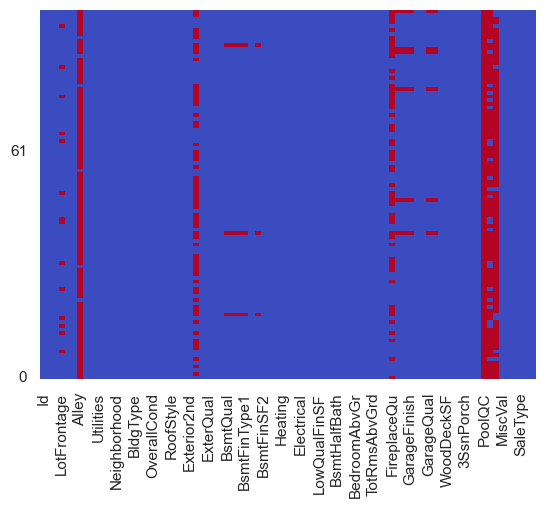

In [11]:
# Visualizando de forma rápida, simples e clara a proporção de valores nulos utilizando um gráfico.
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.ylim(0, 100)
plt.show()

In [12]:
# Filtrando as linhas onde todos os valores são faltantes no df
df[df.isnull().all(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [13]:
# filtrando quais são as colunas que possuem algum valor faltante
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Condition2      0.000000
dtype: float64

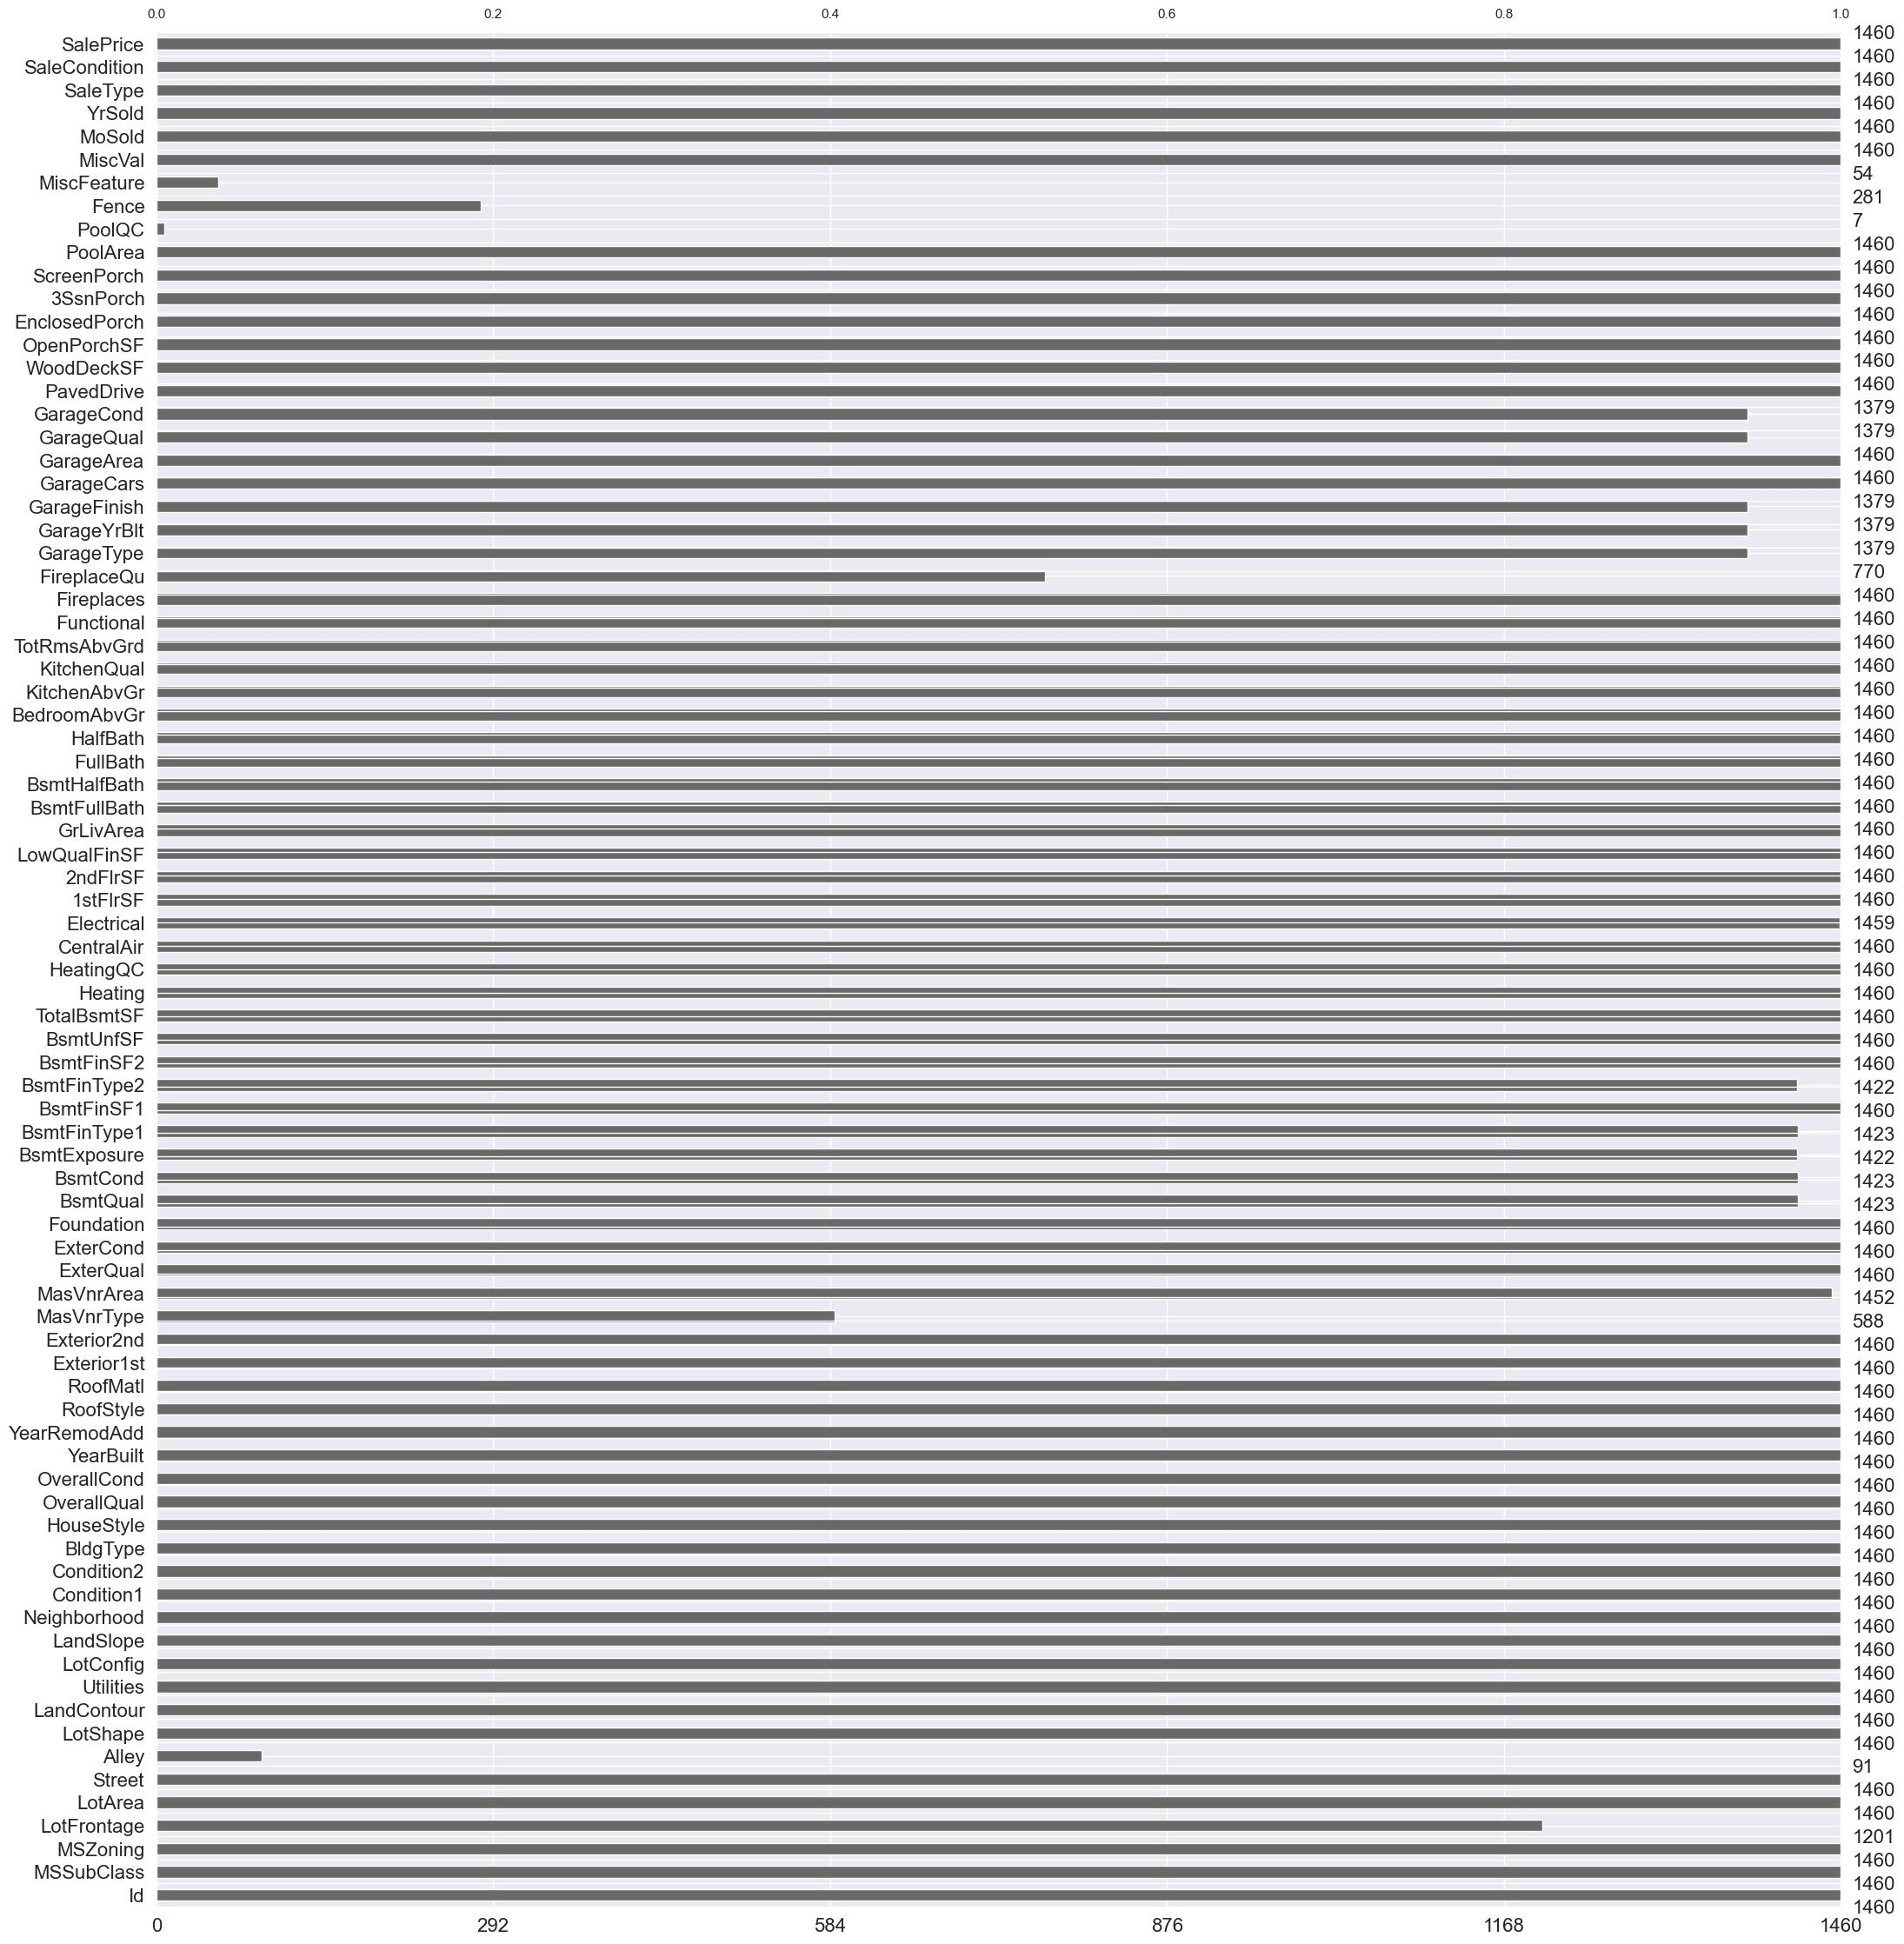

In [14]:
# Usando uma biblioteca específica que nos trás gráficos intuitivos sobre os valores faltantes
import missingno as msno
msno.bar(df);

## Tratando os valores Nulos

In [16]:
# Colunas com mais de 10% de valores vazios
eliminar = df.columns[(df.isnull().sum() / df.shape[0]) > 0.1].to_list()
eliminar

['LotFrontage',
 'Alley',
 'MasVnrType',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [17]:
# Eliminando colunas, e tratando os demais valores faltantes
df_copia = df.drop(eliminar, axis=1)
df_copia.fillna(-1, inplace=True)

df_copia.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [18]:
# Obtendo apenas as colunas númericas para o modelo 
col_num = df_copia.columns[df_copia.dtypes != "object"]
col_num

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [19]:
# filtrando e criando essa nova base com esses valores
df_copia = df_copia.loc[:, col_num]
df_copia.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125
1459,1460,20,9937,5,6,1965,1965,0.0,830,290,136,1256,1256,0,0,1256,1,0,1,1,3,1,6,0,1965.0,1,276,736,68,0,0,0,0,0,6,2008,147500


## Separando em treino e teste

In [21]:
# Separando a coluna alvo das demais
X = df_copia.drop(columns='SalePrice', axis=1)
y = df_copia["SalePrice"]

In [22]:
# Sepeparando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

In [23]:
# Visualizando o resultado
X_train.shape, X_test.shape

((978, 36), (482, 36))

In [24]:
y_train.shape, y_test.shape

((978,), (482,))

In [25]:
# Instanciando o objeto, treinando os dados e fazendo a previsão com o modelo de regressão linear.
regressor = LinearRegression().fit(X_train, y_train)
y_pred_reg = regressor.predict(X_test)

In [26]:
# Agora o mesmo para o KNN
knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [27]:
# Também para o de Árvoe de Decisão 
arvore = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_arvore = arvore.predict(X_test)

## Utilizando Métricas para avaliar os modelos

In [29]:
# Avaliando numericamente o erros dos modelos. Primeiramente o de Regressão Linear
print("mae: ",round(mean_absolute_error(y_test, y_pred_reg), 2))
print("mse: ",round(mean_squared_error(y_test, y_pred_reg), 2))
print("rmse: ", round(root_mean_squared_error(y_test, y_pred_reg), 2))
print('score train R²: ', round(regressor.score(X_train, y_train), 3))
print('score test R²: ', round(regressor.score(X_test, y_test), 3))

mae:  23763.19
mse:  1533982883.44
rmse:  39166.09
score train R²:  0.814
score test R²:  0.791


In [30]:
# Agora para o KNN
print("mae: ",round(mean_absolute_error(y_test, y_pred_knn), 2))
print("mse: ",round(mean_squared_error(y_test, y_pred_knn), 2))
print("rmse: ", round(root_mean_squared_error(y_test, y_pred_knn), 2))
print('score train R²: ', round(knn.score(X_train, y_train), 3))
print('score test R²: ', round(knn.score(X_test, y_test), 3))

mae:  33273.08
mse:  2733937586.84
rmse:  52287.07
score train R²:  0.847
score test R²:  0.628


In [31]:
# Também para o de Árvore de Decisão
print("mae: ",round(mean_absolute_error(y_test, y_pred_arvore), 2))
print("mse: ",round(mean_squared_error(y_test, y_pred_arvore), 2))
print("rmse: ", round(root_mean_squared_error(y_test, y_pred_arvore), 2))
print('score train R²: ', round(arvore.score(X_train, y_train), 3))
print('score test R²: ', round(arvore.score(X_test, y_test), 3))

mae:  27120.77
mse:  2108025399.59
rmse:  45913.24
score train R²:  1.0
score test R²:  0.713


## Conclusão:
De acordo com as métricas utilizadas o modelo com menor erro foi o de Regressão Linear, Porém essa é uma informação estática, não nos diz muito a respeito da **direção** que nossos modelos estão errando, se ele erra mais para **valores maiores**, ou mais para **valores menores**.

## Avaliando visualmente os modelos
- Será utilizado a métrica de avaliação da competição do Kaggle: **root_mean_squared_error**

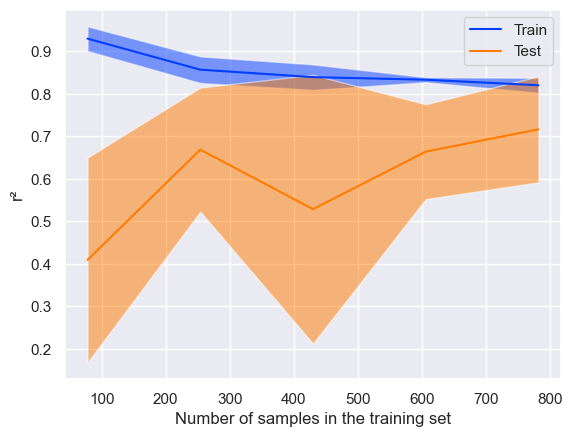

In [34]:
# Regressão Linear
plot_learning_curve(regressor, X_train, y_train, RANDOM_STATE, "r²")

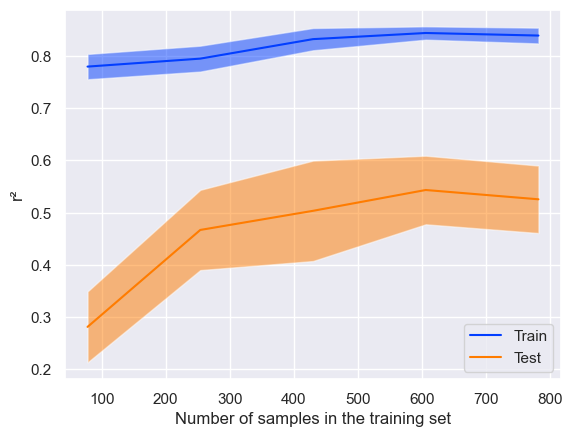

In [35]:
# KNN
plot_learning_curve(knn, X_train, y_train, RANDOM_STATE, 'r²')

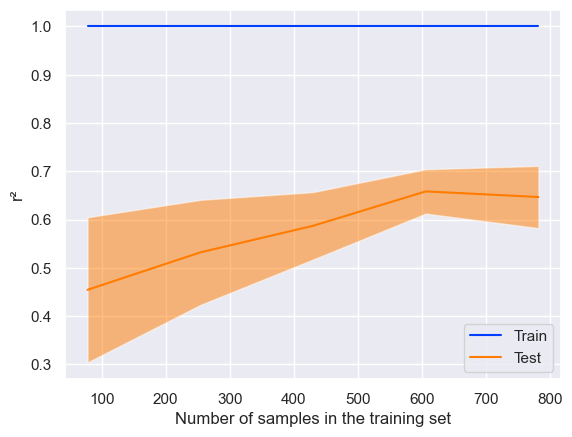

In [36]:
# Árvore de Decisão
plot_learning_curve(arvore, X_train, y_train, RANDOM_STATE, "r²")

## Análise dos residuos

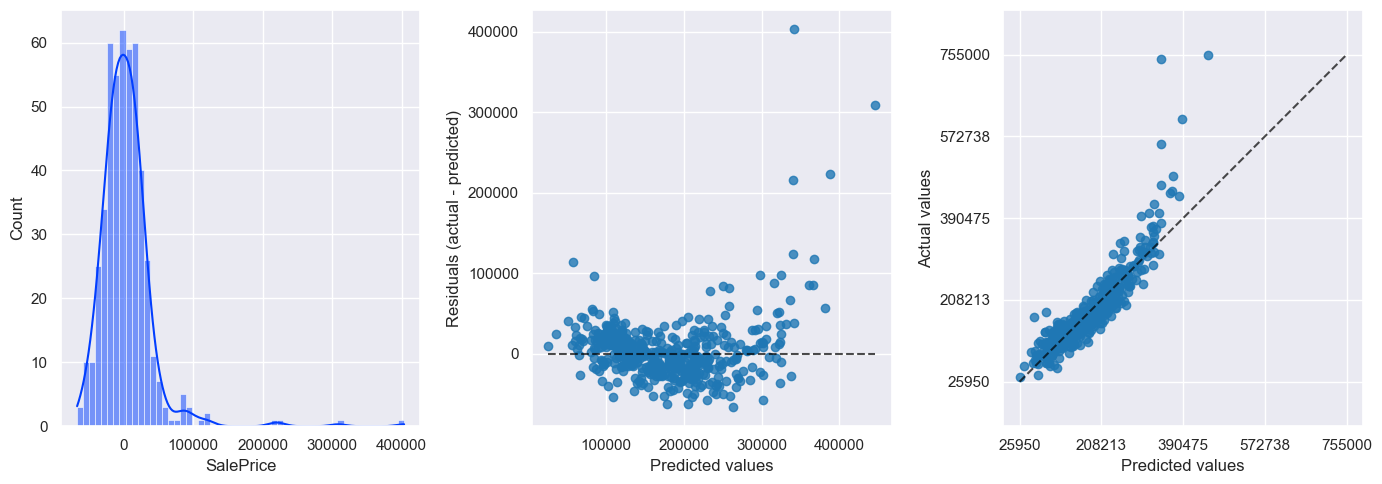

In [38]:
# Regressão Linear
plot_residuos(y_test, y_pred_reg)

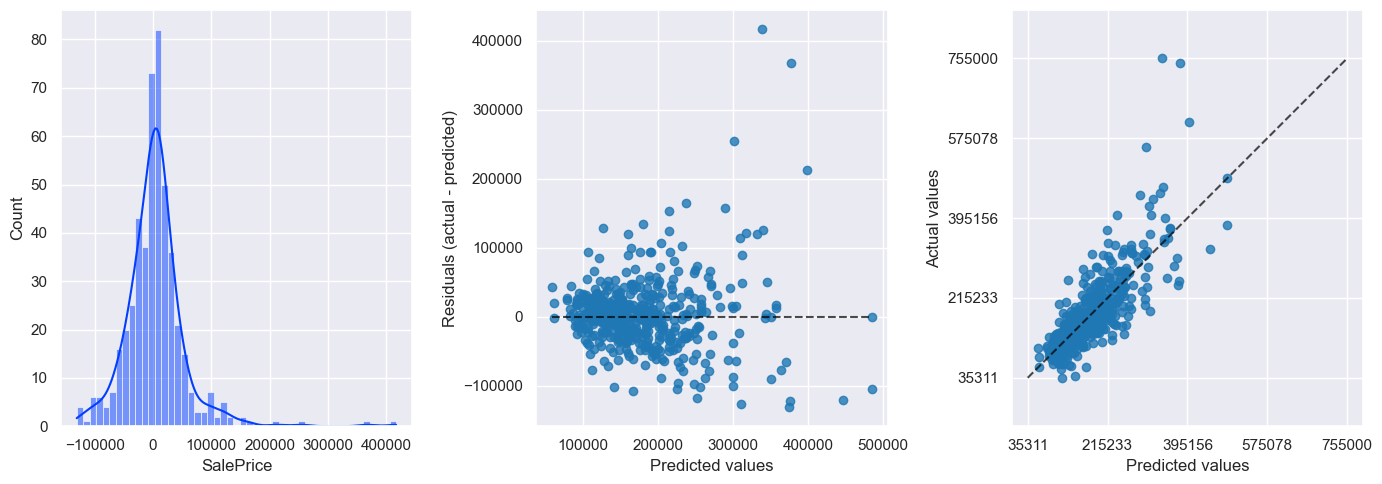

In [39]:
# KNN
plot_residuos(y_test, y_pred_knn)

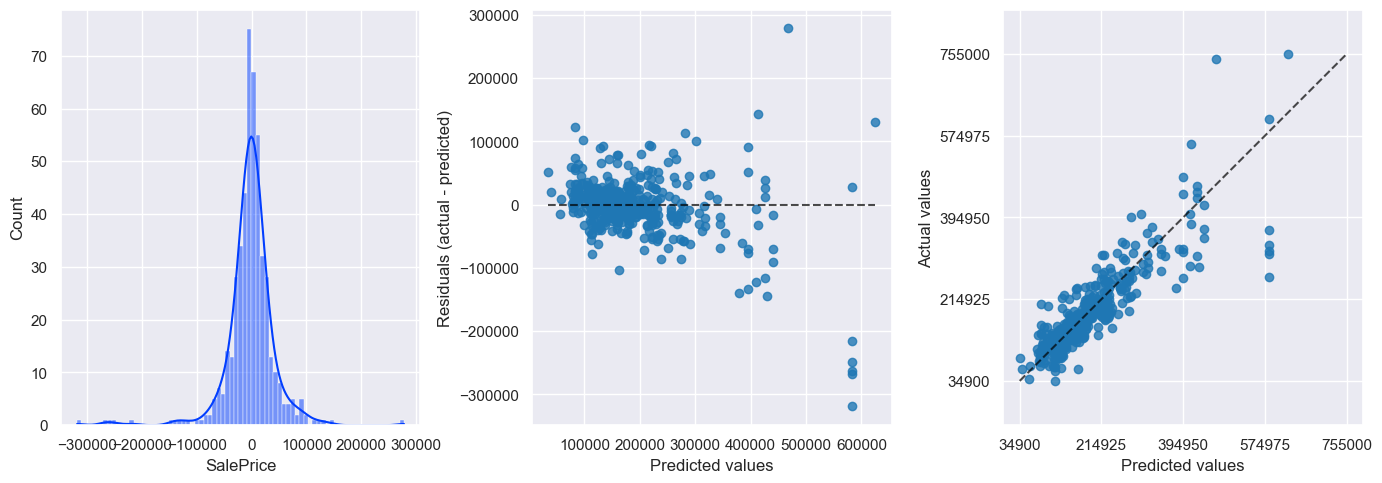

In [40]:
# Árvore de Decisão
plot_residuos(y_test, y_pred_arvore)

**Situação Ideal do Gráfico de Resíduos**: Seria todos os pontos em cima da reta projetada, significando que o modelo previu perfeitamente todas as variações da variável dependente em relação as variáveis independentes.

**Situação Ideal do Gráfico Curva de Aprendizado**: No gráfico do **plot_learning_curve** podemos saber se os nossos modelos estão sofrendo Overfitting ou Underfitting pelo comportamento das linhas de Treino e Teste. Uma situação ideal(normal) o score do modelo pode até começar baixo no teste e alto no treino, porém a partir de uma certa quantidade isso deve aumentar até estabilizar.

**Conclusão da análise dos gráficos em geral para o modelo de Regressão Linear**:
	O modelo de Regressão Linear foi o modelo com o menor erro, e com uma melhor tendencia de estabilização tanto para treino, quanto para teste.
	O modelo apresentou uma certa dificuldade em prever com uma margem de erro aceitável, o preço das casas acima de 300000, Isso significa que os preços reais das casas eram maiores do que os preços previsto pelo modelo.

**Análise para o modelo KNeighborsRegressor**:
 Segundo a curva de aprendizado o modelo não conseguiu performar adequadamente nos dados de teste, ele parece não ser capaz de generalizar para novos dados, sofrendo algo como Overfitting.
 Em relação aos gráficos de resíduos, esse modelo assim como o de Regressão Linear, tem dificuldades de prever os preços das casas aproximadamente acima de 250000, e algumas casas com valores mais baixos, ele previu erroneamente como sendo valores mais altos.

**Análise para o modelo DecisionTreeRegressor**:
 A curva de aprendizado aliada ao resultado da métrica do **R²**, mostra claramente que o modelo de Árvore de Decisão sofreu Overfitting, foi muito bem nos dados de treino, mas quando submetido a dados não vistos(teste), ele teve um score bem baixo.
 Diferente dos outros, esse modelo sofreu mais para prever com uma margem de erro aceitável, o preço mais baixo das casas, mas também errou bastante nos preços de casas mais altos.as mais altos.

## Separando a os dados que serão submetidos na competição do Kaggle:
- Vamos fazer os mesmos tratamentos que foram feitos na base de treino para não gerar erro no modelo.

In [43]:
# Importando a base de teste
df_teste = pd.read_csv("../dados/test.csv")
df_teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [44]:
# Tratando os valores ausentes
df_teste = df_teste.drop(eliminar, axis=1)
df_teste.fillna(-1, inplace=True)

df_teste.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [45]:
# Obtendo somente as colunas numéricas
colunas_num = df_teste.columns[df_teste.dtypes != "object"]
colunas_num

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], dtype='object')

In [46]:
# Filtrando a base
df_teste = df_teste.loc[:, colunas_num]
df_teste.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,-1.0,0.0,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,-1.0,0.0,0.0,80,32,0,0,0,0,700,7,2006
1458,2919,60,9627,7,5,1993,1994,94.0,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006


In [47]:
# Utilizando o modelo selecionado para fazer a previsão
y_pred = regressor.predict(df_teste)

In [48]:
# Criando nosso target
df_teste["SalePrice"] = y_pred

In [49]:
# Selecionando apenas as colunas necessárias(seguindo as regras da competição)
base_do_kaggle = df_teste[['Id', 'SalePrice']]

In [50]:
# Importando a base, para submete-la a competição do Kaggle
base_do_kaggle.to_csv("../dados/01_resultado_projeto.csv", index=False)